In [139]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np

### Get latest data from nytimes:

In [140]:
df_counties = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

df_states = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

In [141]:
df_counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [142]:
df_states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [143]:
df_states.date = pd.to_datetime(df_states.date)
df_counties.date = pd.to_datetime(df_counties.date)

In [144]:
df2 = df_states.pivot(index='date', columns='state', values='deaths').reset_index()

In [145]:
#df3.head()

In [146]:
df3 = df2.copy().drop(columns=['date'])
for state in df2.columns[1:]:
    #print(state)
    try:
        #chose 9 days b/c with threshold of exactly 10, Michigan has an odd start position
        start_date = df3[df3[state] >= 9].index[0]
        df3[state] = df3[state].shift(-start_date)
    except:
        start_date = 0
        #print("not yet >10; skipping ")
        df3 = df3.drop(state, axis=1)
df3.index.name = 'days'
# drop if less than three datapoints:
df3 = df3[[col for col in df3.columns if df3[col].count() > 2]]

In [147]:
df3 = df3.dropna(how='all')
plot_df = df3.reset_index().melt(id_vars='days')
plot_df

,days,state,value
0,0,Arizona,15.0
1,1,Arizona,15.0
2,2,Arizona,18.0
3,3,Arizona,NaN
4,4,Arizona,NaN
...,...,...,...
643,22,Wisconsin,NaN
644,23,Wisconsin,NaN
645,24,Wisconsin,NaN
646,25,Wisconsin,NaN


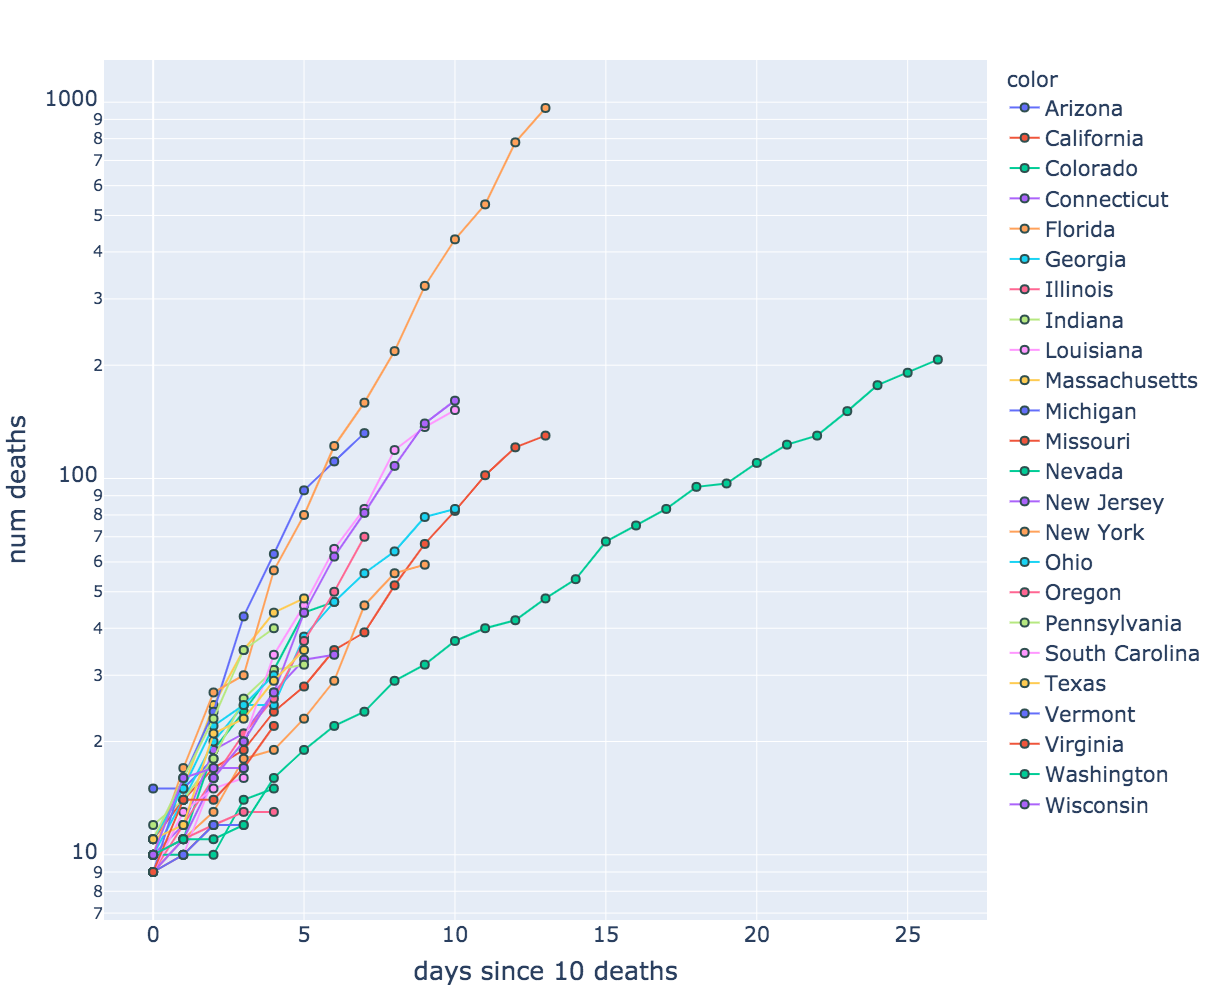

In [148]:
plt = px.scatter(x=plot_df.days, y=plot_df.value, color=plot_df.state,
              width=1200, height=1000, 
              log_y=True,
              labels=dict(y='num deaths', x='days since 10 deaths')
            )

plt.update_traces(mode='lines+markers',
                  marker=dict(size=8,
                              line=dict(width=2,
                                        color='DarkSlateGrey')))
plt.update_layout(font=dict(
        size=21))
plt.show()

In [151]:
#repeat for counties:
df_counties['countystate'] = df_counties.county + ', ' +  df_counties.state
df_c2 =df_counties.drop(columns='state').pivot(index='date', columns='countystate', values='deaths').reset_index()
df_c3 = df_c2.copy().drop(columns=['date'])

In [152]:
df_c3['Detroit'] = df_c3['Wayne, Michigan'] + df_c3['Oakland, Michigan'] + df_c3['Macomb, Michigan']
#print(df_c3['Detroit'])

In [153]:
#drop unknown data because the aggregation isn't helpful
df_c3 = df_c3[[col for col in df_c3.columns if 'Unknown' not in col and df_c3[col].count() > 2]]
# drop if less than three datapoints:
df_c3 = df_c3[[col for col in df_c3.columns if df_c3[col].count() > 2]]

In [154]:
for countystate in df_c3.columns[1:]:
    try:
        #chose 9 days b/c with threshold of exactly 10, Michigan has an odd start position
        start_date = df_c3[df_c3[countystate] >= 5].index[0]
        df_c3[countystate] = df_c3[countystate].shift(-start_date)
    except:
        start_date = 0
        #print("not yet >10; skipping ")
        df_c3 = df_c3.drop(countystate, axis=1)
df_c3 = df_c3[[col for col in df_c3.columns if df_c3[col].count() > 6]]
df_c3.index.name = 'days'

In [155]:
#get rid of zeros
df_c3 = df_c3.replace(0, np.nan)
df_c3 = df_c3.dropna(how='all')

In [156]:
plot_df_c = df_c3.reset_index().melt(id_vars='days')
plot_df_c

,days,countystate,value
0,0,"Abbeville, South Carolina",NaN
1,1,"Abbeville, South Carolina",NaN
2,2,"Abbeville, South Carolina",NaN
3,3,"Abbeville, South Carolina",NaN
4,4,"Abbeville, South Carolina",NaN
...,...,...,...
555,23,Detroit,NaN
556,24,Detroit,NaN
557,25,Detroit,NaN
558,26,Detroit,NaN


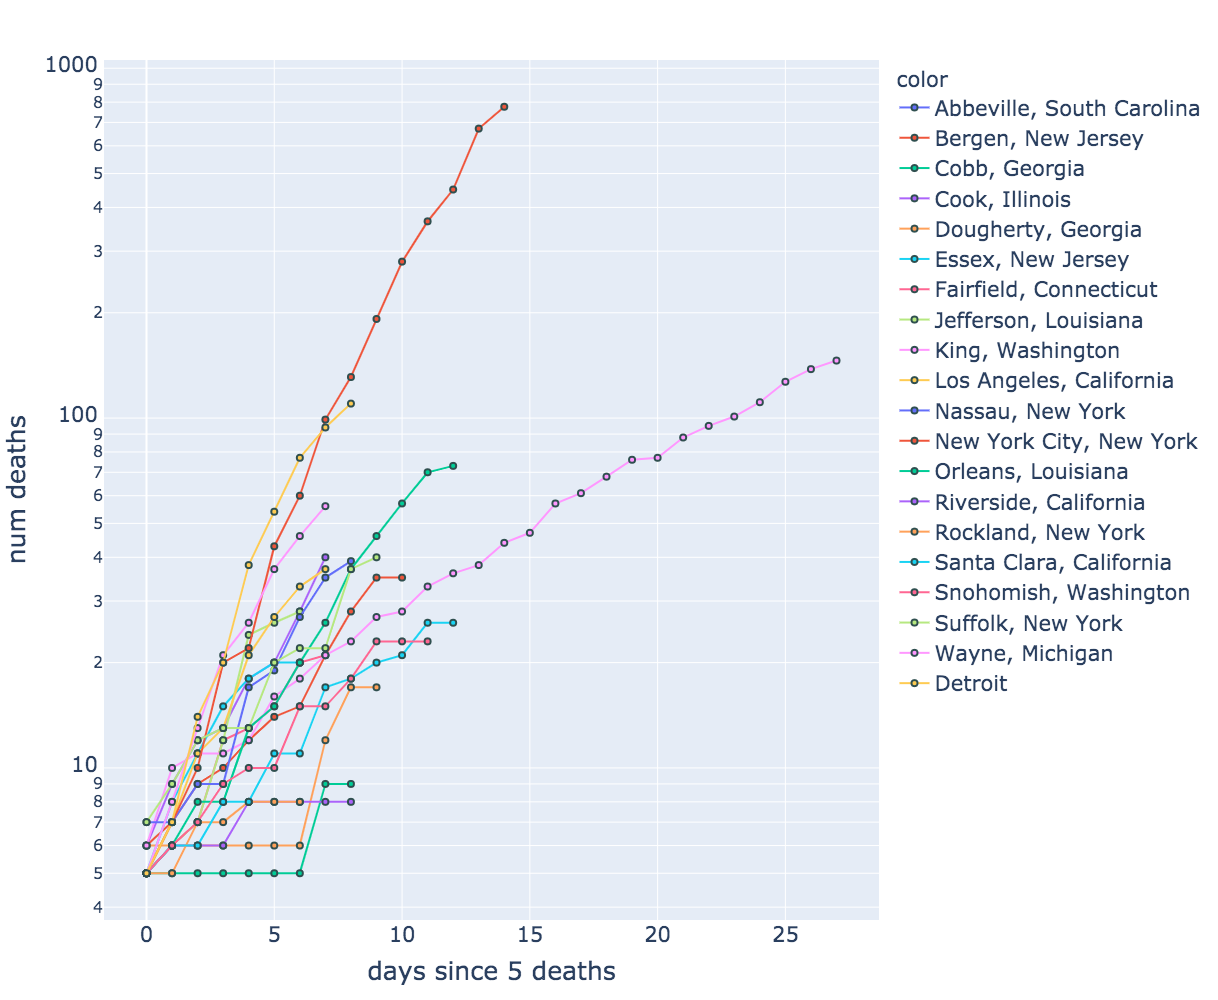

In [157]:
plt2 = px.scatter(x=plot_df_c.days, y=plot_df_c.value, color=plot_df_c.countystate,
              width=1200, height=1000, 
              log_y=True,
              labels=dict(y='num deaths', x='days since 5 deaths')
            )

plt2.update_traces(mode='lines+markers',
                  marker=dict(size=6,
                              line=dict(width=2,
                                        color='DarkSlateGrey')))
plt2.update_layout(font=dict(
        size=21))
plt2.show()